## Logic Based FizzBuzz Function [Software 1.0]

In [43]:
import pandas as pd

def fizzbuzz(n):
    
    # Logic Explanation
    # Returns string
        #   'FizzBuzz' when the number n is divisible by 3 and 5
        #   'Fizz' when the number n is only divisible by 3
        #   'Buzz' when the number n is only divisible by 5
    if n % 3 == 0 and n % 5 == 0:
        return 'FizzBuzz'
    elif n % 3 == 0:
        return 'Fizz'
    elif n % 5 == 0:
        return 'Buzz'
    else:
        return 'Other'

## Create Training and Testing Datasets in CSV Format

In [44]:
def createInputCSV(start,end,filename):
    
    # Why list in Python?
        # We need a data type that can hold multiple values, can be modified and values can be added to it.
    inputData   = []
    outputData  = []
    
    # Why do we need training Data?
        # Training data is required to train the neural network and thus predict the output data for test data.
        # In supervised learning, without training the data, we cannot build a neural network 
    for i in range(start,end):
        inputData.append(i)
        outputData.append(fizzbuzz(i))
    
    # Why Dataframe?
        # Here dataframe is apt as we need to use a data structure that takes columns of potentioally different types, just like a
        # spreadsheet or SQL table or a dict of Series objects
    dataset = {}
    dataset["input"]  = inputData
    dataset["label"] = outputData
    
    # Writing to csv
    pd.DataFrame(dataset).to_csv(filename)
    
    print(filename, "Created!")

## Processing Input and Label Data

In [45]:
def processData(dataset):
    
    # Why do we have to process?
        # We need to process to convert the input values and label to corresponding binary representation before passing the them
        # to the fit module 
    data   = dataset['input'].values
    labels = dataset['label'].values
    
    processedData  = encodeData(data)
    processedLabel = encodeLabel(labels)
    
    return processedData, processedLabel

In [46]:
def encodeData(data):
    
    processedData = []
    
    for dataInstance in data:
        
        # Why do we have number 10?
            # The maximum number in the input data will be 1000. To hold the respective binary representation of this number,
            # we need 10 digits of space, ceil(log2(1000))=10
        processedData.append([dataInstance >> d & 1 for d in range(10)])
    
    return np.array(processedData)

In [47]:
from keras.utils import np_utils

def encodeLabel(labels):
    
    processedLabel = []
    
    for labelInstance in labels:
        if(labelInstance == "FizzBuzz"):
            # Fizzbuzz
            processedLabel.append([3])
        elif(labelInstance == "Fizz"):
            # Fizz
            processedLabel.append([1])
        elif(labelInstance == "Buzz"):
            # Buzz
            processedLabel.append([2])
        else:
            # Other
            processedLabel.append([0])

    return np_utils.to_categorical(np.array(processedLabel),4)

## Model Definition

In [48]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard

import numpy as np

input_size = 10
drop_out = 0.2
first_dense_layer_nodes  = 1024
second_dense_layer_nodes = 4

def get_model():
    
    # Why do we need a model?
        # We need a way to organize and configure inputs and outputs for layers and that is what a model does. It is required to 
        # build a neural network, its components(input layer, hidden layer and output layer)
    
    # Why use Dense layer and then activation?
        # At first, we need to specify the the number of nodes in next(or first) dense layer. Post that only we can apply the
        # activation function to get the next(or first) dense layer. Here the number of nodes in the first hidden layer is 256
    # Why use sequential model with layers?
        # Sequential model is a simple model and is used when  single input leads to single output. Here we want our neural network
        # to take single input and predict
    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))
    
    # Why dropout?
        # Dropout is used for regularization in order to reduce the complexity of the model and prevent overfitting.
    model.add(Dropout(drop_out))
    
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('softmax'))
    # Why Softmax?
        # Softmax function is used to predict probabilities associated with a multinoulli distribution. It squashes the output of
        # each unit to be between 0 and 1 and also divides each output such that the total sum of the outputs is equal to 1. It is
        # used in multiple classification logistic regression model
    
    model.summary()
    
    # Why use categorical_crossentropy?
        # Using Categorical Cross Entropy because here we want to classify the output into 4 classes
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# <font color='blue'>Creating Training and Testing Datafiles</font>

In [49]:
# Create datafiles
createInputCSV(101,1001,'training.csv')
createInputCSV(1,101,'testing.csv')

training.csv Created!
testing.csv Created!


# <font color='blue'>Creating Model</font>

In [50]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1024)              11264     
_________________________________________________________________
activation_9 (Activation)    (None, 1024)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 4100      
_________________________________________________________________
activation_10 (Activation)   (None, 4)                 0         
Total params: 15,364
Trainable params: 15,364
Non-trainable params: 0
_________________________________________________________________


# <font color = blue>Run Model</font>

In [51]:
validation_data_split = 0.1
num_epochs = 10000
model_batch_size = 128
tb_batch_size = 32
early_patience = 100

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

# Read Dataset
dataset = pd.read_csv('training.csv')

# Process Dataset
processedData, processedLabel = processData(dataset)
history = model.fit(processedData
                    , processedLabel
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

Train on 810 samples, validate on 90 samples
Epoch 1/10000
810/810 [==============================] - 1s 721us/step - loss: 1.2329 - acc: 0.4741 - val_loss: 1.1598 - val_acc: 0.5333
Epoch 2/10000
810/810 [==============================] - 0s 69us/step - loss: 1.1539 - acc: 0.5333 - val_loss: 1.1565 - val_acc: 0.5333
Epoch 3/10000
810/810 [==============================] - 0s 62us/step - loss: 1.1496 - acc: 0.5333 - val_loss: 1.1686 - val_acc: 0.5333
Epoch 4/10000
810/810 [==============================] - 0s 62us/step - loss: 1.1482 - acc: 0.5333 - val_loss: 1.1570 - val_acc: 0.5333
Epoch 5/10000
810/810 [==============================] - 0s 64us/step - loss: 1.1402 - acc: 0.5333 - val_loss: 1.1434 - val_acc: 0.5333
Epoch 6/10000
810/810 [==============================] - 0s 57us/step - loss: 1.1395 - acc: 0.5333 - val_loss: 1.1611 - val_acc: 0.5333
Epoch 7/10000
810/810 [==============================] - 0s 63us/step - loss: 1.1389 - acc: 0.5333 - val_loss: 1.1473 - val_acc: 0.5333
Ep

810/810 [==============================] - 0s 61us/step - loss: 0.8745 - acc: 0.6198 - val_loss: 0.9982 - val_acc: 0.5556
Epoch 61/10000
810/810 [==============================] - 0s 71us/step - loss: 0.8690 - acc: 0.6235 - val_loss: 0.9933 - val_acc: 0.5556
Epoch 62/10000
810/810 [==============================] - 0s 63us/step - loss: 0.8549 - acc: 0.6123 - val_loss: 0.9972 - val_acc: 0.5667
Epoch 63/10000
810/810 [==============================] - 0s 57us/step - loss: 0.8526 - acc: 0.6383 - val_loss: 0.9865 - val_acc: 0.5444
Epoch 64/10000
810/810 [==============================] - 0s 57us/step - loss: 0.8404 - acc: 0.6173 - val_loss: 0.9747 - val_acc: 0.5889
Epoch 65/10000
810/810 [==============================] - 0s 65us/step - loss: 0.8373 - acc: 0.6272 - val_loss: 0.9750 - val_acc: 0.5556
Epoch 66/10000
810/810 [==============================] - 0s 65us/step - loss: 0.8342 - acc: 0.6284 - val_loss: 0.9988 - val_acc: 0.5333
Epoch 67/10000
810/810 [==============================] 

Epoch 120/10000
810/810 [==============================] - 0s 69us/step - loss: 0.5072 - acc: 0.9000 - val_loss: 0.7407 - val_acc: 0.6111
Epoch 121/10000
810/810 [==============================] - 0s 75us/step - loss: 0.5117 - acc: 0.8914 - val_loss: 0.7317 - val_acc: 0.7111
Epoch 122/10000
810/810 [==============================] - 0s 80us/step - loss: 0.5058 - acc: 0.8802 - val_loss: 0.7206 - val_acc: 0.8111
Epoch 123/10000
810/810 [==============================] - 0s 79us/step - loss: 0.4999 - acc: 0.8889 - val_loss: 0.7215 - val_acc: 0.6778
Epoch 124/10000
810/810 [==============================] - 0s 65us/step - loss: 0.4848 - acc: 0.9037 - val_loss: 0.7605 - val_acc: 0.5889
Epoch 125/10000
810/810 [==============================] - 0s 88us/step - loss: 0.4801 - acc: 0.8963 - val_loss: 0.7389 - val_acc: 0.7556
Epoch 126/10000
810/810 [==============================] - 0s 89us/step - loss: 0.4763 - acc: 0.9049 - val_loss: 0.7226 - val_acc: 0.6222
Epoch 127/10000
810/810 [=========

810/810 [==============================] - 0s 67us/step - loss: 0.2647 - acc: 0.9728 - val_loss: 0.4966 - val_acc: 0.8444
Epoch 180/10000
810/810 [==============================] - 0s 60us/step - loss: 0.2743 - acc: 0.9642 - val_loss: 0.5109 - val_acc: 0.7778
Epoch 181/10000
810/810 [==============================] - 0s 66us/step - loss: 0.2668 - acc: 0.9728 - val_loss: 0.4869 - val_acc: 0.8667
Epoch 182/10000
810/810 [==============================] - 0s 65us/step - loss: 0.2600 - acc: 0.9716 - val_loss: 0.5113 - val_acc: 0.7556
Epoch 183/10000
810/810 [==============================] - 0s 63us/step - loss: 0.2502 - acc: 0.9728 - val_loss: 0.4949 - val_acc: 0.7778
Epoch 184/10000
810/810 [==============================] - 0s 66us/step - loss: 0.2472 - acc: 0.9778 - val_loss: 0.4748 - val_acc: 0.8778
Epoch 185/10000
810/810 [==============================] - 0s 65us/step - loss: 0.2443 - acc: 0.9852 - val_loss: 0.4779 - val_acc: 0.8778
Epoch 186/10000
810/810 [=========================

810/810 [==============================] - 0s 72us/step - loss: 0.1519 - acc: 0.9815 - val_loss: 0.3546 - val_acc: 0.9333
Epoch 239/10000
810/810 [==============================] - 0s 68us/step - loss: 0.1418 - acc: 0.9901 - val_loss: 0.3315 - val_acc: 0.9444
Epoch 240/10000
810/810 [==============================] - 0s 75us/step - loss: 0.1418 - acc: 0.9877 - val_loss: 0.3731 - val_acc: 0.9222
Epoch 241/10000
810/810 [==============================] - 0s 71us/step - loss: 0.1338 - acc: 0.9914 - val_loss: 0.3360 - val_acc: 0.9444
Epoch 242/10000
810/810 [==============================] - 0s 60us/step - loss: 0.1435 - acc: 0.9877 - val_loss: 0.4322 - val_acc: 0.7889
Epoch 243/10000
810/810 [==============================] - 0s 63us/step - loss: 0.1361 - acc: 0.9864 - val_loss: 0.3856 - val_acc: 0.8556
Epoch 244/10000
810/810 [==============================] - 0s 58us/step - loss: 0.1367 - acc: 0.9889 - val_loss: 0.3125 - val_acc: 0.9444
Epoch 245/10000
810/810 [=========================

810/810 [==============================] - 0s 55us/step - loss: 0.0786 - acc: 0.9926 - val_loss: 0.2639 - val_acc: 0.9444
Epoch 298/10000
810/810 [==============================] - 0s 61us/step - loss: 0.0870 - acc: 0.9951 - val_loss: 0.2539 - val_acc: 0.9444
Epoch 299/10000
810/810 [==============================] - 0s 65us/step - loss: 0.0803 - acc: 0.9963 - val_loss: 0.2623 - val_acc: 0.9556
Epoch 300/10000
810/810 [==============================] - 0s 59us/step - loss: 0.0773 - acc: 0.9938 - val_loss: 0.2505 - val_acc: 0.9444
Epoch 301/10000
810/810 [==============================] - 0s 71us/step - loss: 0.0902 - acc: 0.9914 - val_loss: 0.2470 - val_acc: 0.9556
Epoch 302/10000
810/810 [==============================] - 0s 73us/step - loss: 0.0808 - acc: 0.9901 - val_loss: 0.3412 - val_acc: 0.8556
Epoch 303/10000
810/810 [==============================] - 0s 68us/step - loss: 0.0801 - acc: 0.9889 - val_loss: 0.2502 - val_acc: 0.9667
Epoch 304/10000
810/810 [=========================

810/810 [==============================] - 0s 44us/step - loss: 0.0551 - acc: 0.9963 - val_loss: 0.1713 - val_acc: 0.9778
Epoch 357/10000
810/810 [==============================] - 0s 55us/step - loss: 0.0484 - acc: 0.9975 - val_loss: 0.4289 - val_acc: 0.7667
Epoch 358/10000
810/810 [==============================] - 0s 58us/step - loss: 0.0584 - acc: 0.9938 - val_loss: 0.2518 - val_acc: 0.9111
Epoch 359/10000
810/810 [==============================] - 0s 64us/step - loss: 0.0557 - acc: 0.9938 - val_loss: 0.1975 - val_acc: 0.9556
Epoch 360/10000
810/810 [==============================] - 0s 57us/step - loss: 0.0548 - acc: 0.9975 - val_loss: 0.2354 - val_acc: 0.9556
Epoch 361/10000
810/810 [==============================] - 0s 82us/step - loss: 0.0495 - acc: 0.9975 - val_loss: 0.1741 - val_acc: 0.9889
Epoch 362/10000
810/810 [==============================] - 0s 53us/step - loss: 0.0490 - acc: 0.9975 - val_loss: 0.2065 - val_acc: 0.9444
Epoch 363/10000
810/810 [=========================

810/810 [==============================] - 0s 57us/step - loss: 0.0382 - acc: 0.9963 - val_loss: 0.2466 - val_acc: 0.9222
Epoch 416/10000
810/810 [==============================] - 0s 62us/step - loss: 0.0418 - acc: 0.9963 - val_loss: 0.1873 - val_acc: 0.9444
Epoch 417/10000
810/810 [==============================] - 0s 60us/step - loss: 0.0313 - acc: 1.0000 - val_loss: 0.3204 - val_acc: 0.8556
Epoch 418/10000
810/810 [==============================] - 0s 59us/step - loss: 0.0387 - acc: 0.9951 - val_loss: 0.1544 - val_acc: 0.9778
Epoch 419/10000
810/810 [==============================] - 0s 50us/step - loss: 0.0362 - acc: 0.9963 - val_loss: 0.2758 - val_acc: 0.8778
Epoch 420/10000
810/810 [==============================] - 0s 57us/step - loss: 0.0346 - acc: 0.9963 - val_loss: 0.1534 - val_acc: 0.9778
Epoch 421/10000
810/810 [==============================] - 0s 61us/step - loss: 0.0291 - acc: 0.9988 - val_loss: 0.1791 - val_acc: 0.9444
Epoch 422/10000
810/810 [=========================

810/810 [==============================] - 0s 71us/step - loss: 0.0280 - acc: 0.9975 - val_loss: 0.1695 - val_acc: 0.9667
Epoch 475/10000
810/810 [==============================] - 0s 64us/step - loss: 0.0243 - acc: 0.9988 - val_loss: 0.1307 - val_acc: 0.9667
Epoch 476/10000
810/810 [==============================] - 0s 67us/step - loss: 0.0229 - acc: 0.9988 - val_loss: 0.1140 - val_acc: 0.9889
Epoch 477/10000
810/810 [==============================] - 0s 58us/step - loss: 0.0286 - acc: 0.9963 - val_loss: 0.1625 - val_acc: 0.9778
Epoch 478/10000
810/810 [==============================] - 0s 58us/step - loss: 0.0287 - acc: 0.9975 - val_loss: 0.1197 - val_acc: 0.9889
Epoch 479/10000
810/810 [==============================] - 0s 61us/step - loss: 0.0244 - acc: 0.9963 - val_loss: 0.1613 - val_acc: 0.9667
Epoch 480/10000
810/810 [==============================] - 0s 61us/step - loss: 0.0321 - acc: 0.9963 - val_loss: 0.2668 - val_acc: 0.9111
Epoch 481/10000
810/810 [=========================

810/810 [==============================] - 0s 66us/step - loss: 0.0196 - acc: 0.9975 - val_loss: 0.1204 - val_acc: 0.9889
Epoch 534/10000
810/810 [==============================] - 0s 73us/step - loss: 0.0169 - acc: 0.9988 - val_loss: 0.1239 - val_acc: 0.9667
Epoch 535/10000
810/810 [==============================] - 0s 71us/step - loss: 0.0146 - acc: 1.0000 - val_loss: 0.1305 - val_acc: 0.9889
Epoch 536/10000
810/810 [==============================] - 0s 73us/step - loss: 0.0182 - acc: 0.9988 - val_loss: 0.1563 - val_acc: 0.9667
Epoch 537/10000
810/810 [==============================] - 0s 81us/step - loss: 0.0211 - acc: 0.9963 - val_loss: 0.1814 - val_acc: 0.9333
Epoch 538/10000
810/810 [==============================] - 0s 88us/step - loss: 0.0279 - acc: 0.9926 - val_loss: 0.1201 - val_acc: 0.9778
Epoch 539/10000
810/810 [==============================] - 0s 65us/step - loss: 0.0173 - acc: 1.0000 - val_loss: 0.1492 - val_acc: 0.9444
Epoch 540/10000
810/810 [=========================

810/810 [==============================] - 0s 46us/step - loss: 0.0238 - acc: 0.9951 - val_loss: 0.1059 - val_acc: 0.9889
Epoch 593/10000
810/810 [==============================] - 0s 64us/step - loss: 0.0144 - acc: 0.9988 - val_loss: 0.1229 - val_acc: 0.9778
Epoch 594/10000
810/810 [==============================] - 0s 61us/step - loss: 0.0156 - acc: 0.9988 - val_loss: 0.1715 - val_acc: 0.9556
Epoch 595/10000
810/810 [==============================] - 0s 59us/step - loss: 0.0142 - acc: 0.9975 - val_loss: 0.1170 - val_acc: 0.9889
Epoch 596/10000
810/810 [==============================] - 0s 55us/step - loss: 0.0179 - acc: 0.9975 - val_loss: 0.0998 - val_acc: 0.9778
Epoch 597/10000
810/810 [==============================] - 0s 64us/step - loss: 0.0173 - acc: 1.0000 - val_loss: 0.0878 - val_acc: 0.9889
Epoch 598/10000
810/810 [==============================] - 0s 58us/step - loss: 0.0164 - acc: 0.9988 - val_loss: 0.1582 - val_acc: 0.9667
Epoch 599/10000
810/810 [=========================

810/810 [==============================] - 0s 69us/step - loss: 0.0091 - acc: 1.0000 - val_loss: 0.1122 - val_acc: 0.9778
Epoch 652/10000
810/810 [==============================] - 0s 58us/step - loss: 0.0096 - acc: 1.0000 - val_loss: 0.1753 - val_acc: 0.9444
Epoch 653/10000
810/810 [==============================] - 0s 66us/step - loss: 0.0119 - acc: 0.9988 - val_loss: 0.1535 - val_acc: 0.9556
Epoch 654/10000
810/810 [==============================] - 0s 78us/step - loss: 0.0108 - acc: 1.0000 - val_loss: 0.1080 - val_acc: 0.9889
Epoch 655/10000
810/810 [==============================] - 0s 66us/step - loss: 0.0098 - acc: 0.9988 - val_loss: 0.2231 - val_acc: 0.9222
Epoch 656/10000
810/810 [==============================] - 0s 63us/step - loss: 0.0149 - acc: 0.9988 - val_loss: 0.1326 - val_acc: 0.9667
Epoch 657/10000
810/810 [==============================] - 0s 76us/step - loss: 0.0139 - acc: 0.9988 - val_loss: 0.1011 - val_acc: 0.9889
Epoch 658/10000
810/810 [=========================

810/810 [==============================] - 0s 59us/step - loss: 0.0108 - acc: 0.9988 - val_loss: 0.1020 - val_acc: 0.9889
Epoch 711/10000
810/810 [==============================] - 0s 54us/step - loss: 0.0082 - acc: 0.9988 - val_loss: 0.2594 - val_acc: 0.9000
Epoch 712/10000
810/810 [==============================] - 0s 53us/step - loss: 0.0093 - acc: 1.0000 - val_loss: 0.1086 - val_acc: 0.9889
Epoch 713/10000
810/810 [==============================] - 0s 67us/step - loss: 0.0075 - acc: 1.0000 - val_loss: 0.1367 - val_acc: 0.9556
Epoch 714/10000
810/810 [==============================] - 0s 70us/step - loss: 0.0066 - acc: 1.0000 - val_loss: 0.1709 - val_acc: 0.9333
Epoch 715/10000
810/810 [==============================] - 0s 61us/step - loss: 0.0084 - acc: 1.0000 - val_loss: 0.1265 - val_acc: 0.9667
Epoch 716/10000
810/810 [==============================] - 0s 67us/step - loss: 0.0077 - acc: 1.0000 - val_loss: 0.1136 - val_acc: 0.9778
Epoch 717/10000
810/810 [=========================

# <font color = blue>Training and Validation Graphs</font>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000240BF7B3E80>,
      dtype=object)

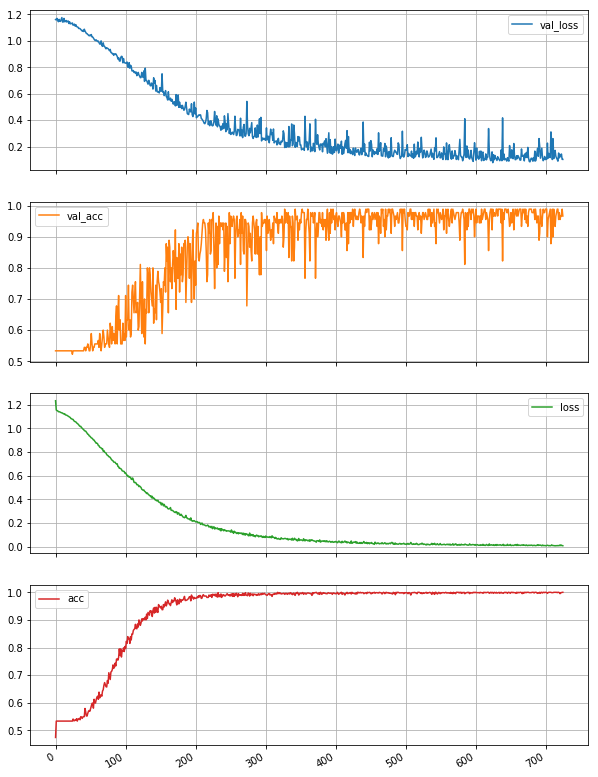

In [52]:
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

# <font color = blue>Testing Accuracy [Software 2.0]</font>

In [53]:
def decodeLabel(encodedLabel):
    if encodedLabel == 0:
        return "Other"
    elif encodedLabel == 1:
        return "Fizz"
    elif encodedLabel == 2:
        return "Buzz"
    elif encodedLabel == 3:
        return "FizzBuzz"

In [54]:
wrong   = 0
right   = 0

testData = pd.read_csv('testing.csv')

processedTestData  = encodeData(testData['input'].values)
processedTestLabel = encodeLabel(testData['label'].values)
predictedTestLabel = []

for i,j in zip(processedTestData,processedTestLabel):
    y = model.predict(np.array(i).reshape(-1,10))
    predictedTestLabel.append(decodeLabel(y.argmax()))
    
    if j.argmax() == y.argmax():
        right = right + 1
    else:
        wrong = wrong + 1

print("Errors: " + str(wrong), " Correct :" + str(right))

print("Testing Accuracy: " + str(right/(right+wrong)*100))

# Please input your UBID and personNumber 
testDataInput = testData['input'].tolist()
testDataLabel = testData['label'].tolist()

testDataInput.insert(0, "UBID")
testDataLabel.insert(0, "gagansun")

testDataInput.insert(1, "personNumber")
testDataLabel.insert(1, "50278729")

predictedTestLabel.insert(0, "")
predictedTestLabel.insert(1, "")

output = {}
output["input"] = testDataInput
output["label"] = testDataLabel

output["predicted_label"] = predictedTestLabel

opdf = pd.DataFrame(output)
opdf.to_csv('output.csv')

Errors: 1  Correct :99
Testing Accuracy: 99.0
